<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорты**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

# **Данные**

In [2]:
!wget https://www.dropbox.com/s/kztcxbki36m8yrn/quora.csv?dl=0

--2020-06-28 12:04:15--  https://www.dropbox.com/s/kztcxbki36m8yrn/quora.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kztcxbki36m8yrn/quora.csv [following]
--2020-06-28 12:04:15--  https://www.dropbox.com/s/raw/kztcxbki36m8yrn/quora.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1bf1c7608c6d6d61c8d57ef08f.dl.dropboxusercontent.com/cd/0/inline/A6iRKi3HkvEawIp5lwlQ3FV4ppZmO-n7XB0kIuR2770s5w9_yDBDFYdTqkeo9eksSt1jUGhhv7A41n5_o-fU-mMlOU8CkD0eXoVI_dKyjMfa1zTrMZHURkNdCDcxedSUTFs/file# [following]
--2020-06-28 12:04:16--  https://uc1bf1c7608c6d6d61c8d57ef08f.dl.dropboxusercontent.com/cd/0/inline/A6iRKi3HkvEawIp5lwlQ3FV4ppZmO-n7XB0kIuR2770s5w9_yDBDFYdTqkeo9eksSt1jUGhhv7A41n5_o-fU-mMlOU8CkD0eXoVI_dKyjMfa1zTrMZH

In [3]:
quora = pd.read_csv('quora.csv?dl=0')

In [4]:
quora.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [5]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

In [6]:
vocab = Counter()

for text in quora.question_text:
    vocab.update(preprocess(text))

In [7]:
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 50:
        filtered_vocab.add(word)
len(filtered_vocab)

14083

In [8]:
word2id = {'UNK':1, 'PAD':0}
for word in filtered_vocab:
    word2id[word] = len(word2id)

In [9]:
id2word = {i:word for word, i in word2id.items()}

In [10]:
X = []

for text in quora.question_text:
    tokens = preprocess(text)
    ids = [word2id.get(token, 1) for token in tokens]
    X.append(ids)

In [11]:
MAX_LEN = max(len(x) for x in X)

In [12]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)

In [13]:
X.shape

(1306122, 134)

In [14]:
y = quora.target.values

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, random_state=42)

# **Задание 1**

**а) конкатенировать эмбединги в один большой эмбединг**

In [85]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)
flat = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(32, activation='relu')(flat)
dense = tf.keras.layers.Dense(32, activation='relu')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=512,
         epochs=10)

Epoch 1/10
2424/2424 [==============================] - 63s 26ms/step - loss: 0.1249 - accuracy: 0.9515 - val_loss: 0.1112 - val_accuracy: 0.9557
Epoch 2/10
2424/2424 [==============================] - 65s 27ms/step - loss: 0.1063 - accuracy: 0.9572 - val_loss: 0.1136 - val_accuracy: 0.9556
Epoch 3/10
2424/2424 [==============================] - 67s 28ms/step - loss: 0.0921 - accuracy: 0.9629 - val_loss: 0.1215 - val_accuracy: 0.9532
Epoch 4/10
2424/2424 [==============================] - 67s 28ms/step - loss: 0.0746 - accuracy: 0.9705 - val_loss: 0.1390 - val_accuracy: 0.9513
Epoch 5/10
2424/2424 [==============================] - 66s 27ms/step - loss: 0.0604 - accuracy: 0.9764 - val_loss: 0.1642 - val_accuracy: 0.9500
Epoch 6/10
2424/2424 [==============================] - 66s 27ms/step - loss: 0.0503 - accuracy: 0.9805 - val_loss: 0.1886 - val_accuracy: 0.9485
Epoch 7/10
2424/2424 [==============================] - 66s 27ms/step - loss: 0.0427 - accuracy: 0.9835 - val_loss: 0.2269 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


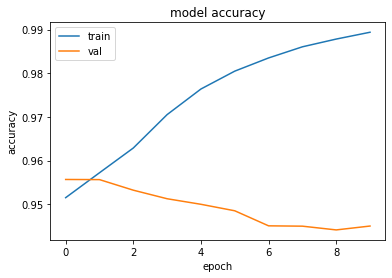

In [87]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [88]:
preds = model.predict(X_valid).reshape(-1)

In [89]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     61365
           1       0.55      0.50      0.52      3942

    accuracy                           0.95     65307
   macro avg       0.76      0.74      0.75     65307
weighted avg       0.94      0.95      0.94     65307



**б) усреднять эмбединги**

In [26]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)
mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=512,
         epochs=10)

Epoch 1/10
2424/2424 [==============================] - 62s 25ms/step - loss: 0.2687 - accuracy: 0.9380 - val_loss: 0.2078 - val_accuracy: 0.9396
Epoch 2/10
2424/2424 [==============================] - 61s 25ms/step - loss: 0.1793 - accuracy: 0.9405 - val_loss: 0.1490 - val_accuracy: 0.9458
Epoch 3/10
2424/2424 [==============================] - 61s 25ms/step - loss: 0.1448 - accuracy: 0.9463 - val_loss: 0.1357 - val_accuracy: 0.9504
Epoch 4/10
2424/2424 [==============================] - 61s 25ms/step - loss: 0.1345 - accuracy: 0.9490 - val_loss: 0.1280 - val_accuracy: 0.9521
Epoch 5/10
2424/2424 [==============================] - 61s 25ms/step - loss: 0.1286 - accuracy: 0.9506 - val_loss: 0.1238 - val_accuracy: 0.9526
Epoch 6/10
2424/2424 [==============================] - 61s 25ms/step - loss: 0.1245 - accuracy: 0.9514 - val_loss: 0.1212 - val_accuracy: 0.9528
Epoch 7/10
2424/2424 [==============================] - 62s 26ms/step - loss: 0.1216 - accuracy: 0.9523 - val_loss: 0.1189 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


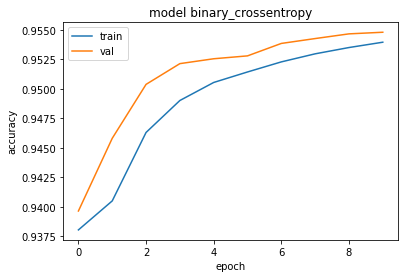

In [28]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
preds = model.predict(X_valid).reshape(-1)

In [30]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     61365
           1       0.69      0.45      0.55      3942

    accuracy                           0.95     65307
   macro avg       0.83      0.72      0.76     65307
weighted avg       0.95      0.95      0.95     65307



**в) складывать эмбединги**

In [31]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs)
summa = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x, axis=1))(embeddings)
dense = tf.keras.layers.Dense(65, activation='relu')(summa)
dense = tf.keras.layers.Dense(65, activation='relu')(summa)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=512,
         epochs=10)

Epoch 1/10
2424/2424 [==============================] - 62s 26ms/step - loss: 0.1678 - accuracy: 0.9400 - val_loss: 0.1232 - val_accuracy: 0.9525
Epoch 2/10
2424/2424 [==============================] - 64s 26ms/step - loss: 0.1207 - accuracy: 0.9528 - val_loss: 0.1154 - val_accuracy: 0.9550
Epoch 3/10
2424/2424 [==============================] - 64s 26ms/step - loss: 0.1144 - accuracy: 0.9546 - val_loss: 0.1134 - val_accuracy: 0.9561
Epoch 4/10
2424/2424 [==============================] - 63s 26ms/step - loss: 0.1112 - accuracy: 0.9555 - val_loss: 0.1130 - val_accuracy: 0.9556
Epoch 5/10
2424/2424 [==============================] - 62s 26ms/step - loss: 0.1093 - accuracy: 0.9562 - val_loss: 0.1123 - val_accuracy: 0.9561
Epoch 6/10
2424/2424 [==============================] - 62s 25ms/step - loss: 0.1077 - accuracy: 0.9567 - val_loss: 0.1120 - val_accuracy: 0.9560
Epoch 7/10
2424/2424 [==============================] - 63s 26ms/step - loss: 0.1063 - accuracy: 0.9572 - val_loss: 0.1125 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


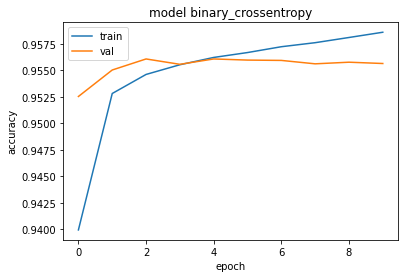

In [33]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model binary_crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
preds = model.predict(X_valid).reshape(-1)

In [40]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     61365
           1       0.70      0.47      0.56      3942

    accuracy                           0.96     65307
   macro avg       0.83      0.73      0.77     65307
weighted avg       0.95      0.96      0.95     65307



Если судить по графикам, то график последней модели выглядит лучше всех, по метрикам у нее тоже высокий результат. У модели с усредненными эмбеддингами метрики тоже довольно высокие. У модели с конкатенацией метрики получились чуть хуже.

# **Задание 2**

In [41]:
import gensim
from gensim.models import FastText
from gensim.models import Word2Vec

In [42]:
texts = quora.question_text.apply(preprocess).tolist()

In [43]:
fasttext = FastText(texts, size=100, window=3, iter=2)
w2v = Word2Vec(texts, size=100, window=3, iter=2)

In [45]:
w2v_weights = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        continue
            
    try:
        w2v_weights[i] = w2v[word] 
    
    except KeyError:
        continue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [46]:
ft_weights = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        ft_weights[i] = fasttext['abswasfdaorra']
    
    try:
        ft_weights[i] = fasttext[word]
    
    except KeyError:
        ft_weights[i] = fasttext['asdfhkjdshfk']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


**Усреднение**

In [48]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings_ft = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[ft_weights])(inputs)
embeddings_w2v = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[w2v_weights])(inputs)
embeddings = tf.keras.layers.Average()([embeddings_ft, embeddings_w2v])

mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=1))(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model1 = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
model1.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=512,
         epochs=10)

Epoch 1/10
2424/2424 [==============================] - 30s 12ms/step - loss: 0.2962 - accuracy: 0.9376 - val_loss: 0.1801 - val_accuracy: 0.9407
Epoch 2/10
2424/2424 [==============================] - 30s 12ms/step - loss: 0.1667 - accuracy: 0.9412 - val_loss: 0.1547 - val_accuracy: 0.9442
Epoch 3/10
2424/2424 [==============================] - 30s 12ms/step - loss: 0.1561 - accuracy: 0.9431 - val_loss: 0.1493 - val_accuracy: 0.9454
Epoch 4/10
2424/2424 [==============================] - 30s 12ms/step - loss: 0.1519 - accuracy: 0.9439 - val_loss: 0.1463 - val_accuracy: 0.9460
Epoch 5/10
2424/2424 [==============================] - 30s 12ms/step - loss: 0.1495 - accuracy: 0.9444 - val_loss: 0.1444 - val_accuracy: 0.9466
Epoch 6/10
2424/2424 [==============================] - 29s 12ms/step - loss: 0.1480 - accuracy: 0.9447 - val_loss: 0.1430 - val_accuracy: 0.9469
Epoch 7/10
2424/2424 [==============================] - 29s 12ms/step - loss: 0.1468 - accuracy: 0.9450 - val_loss: 0.1420 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


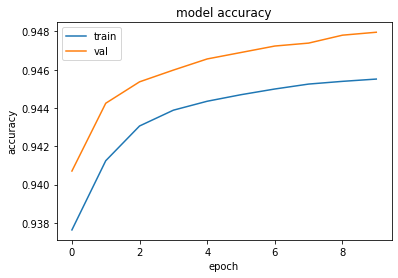

In [51]:
print(model1.history.history.keys())
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
preds = model1.predict(X_valid).reshape(-1)

In [53]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     61365
           1       0.67      0.27      0.39      3942

    accuracy                           0.95     65307
   macro avg       0.81      0.63      0.68     65307
weighted avg       0.94      0.95      0.94     65307



**Конкатенация**

In [54]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings1 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[w2v_weights])(inputs, )
embeddings2 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,weights=[ft_weights])(inputs, )
embeddings = tf.keras.layers.Concatenate()([embeddings1, embeddings2])

mean = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
model2.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=512,
         epochs=10)

Epoch 1/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1462 - accuracy: 0.9452 - val_loss: 0.1330 - val_accuracy: 0.9496
Epoch 2/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1327 - accuracy: 0.9494 - val_loss: 0.1315 - val_accuracy: 0.9499
Epoch 3/10
2424/2424 [==============================] - 33s 13ms/step - loss: 0.1261 - accuracy: 0.9518 - val_loss: 0.1306 - val_accuracy: 0.9505
Epoch 4/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1199 - accuracy: 0.9542 - val_loss: 0.1322 - val_accuracy: 0.9491
Epoch 5/10
2424/2424 [==============================] - 33s 13ms/step - loss: 0.1141 - accuracy: 0.9564 - val_loss: 0.1345 - val_accuracy: 0.9492
Epoch 6/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1089 - accuracy: 0.9586 - val_loss: 0.1377 - val_accuracy: 0.9483
Epoch 7/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1041 - accuracy: 0.9606 - val_loss: 0.1406 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


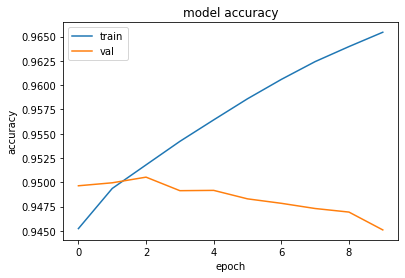

In [56]:
print(model2.history.history.keys())
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
preds = model2.predict(X_valid).reshape(-1)

In [59]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     61365
           1       0.55      0.46      0.50      3942

    accuracy                           0.95     65307
   macro avg       0.76      0.72      0.74     65307
weighted avg       0.94      0.95      0.94     65307



Если судить по метрикам, модель с конкатенацией справляется лучше, чем с усреднением. 

# **Эксперименты**

**Поэкспериментируем сначала с различными активациями Dense**

Возьмем последнюю модель с конкатенацией

In [62]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings1 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False, weights=[w2v_weights])(inputs, )
embeddings2 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,weights=[ft_weights])(inputs, )
embeddings = tf.keras.layers.Concatenate()([embeddings1, embeddings2])

mean = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(32, activation='softmax')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
dense = tf.keras.layers.Dense(64)(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

exp_model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
exp_model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
exp_model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=512,
         epochs=10)

Epoch 1/10
2424/2424 [==============================] - 33s 14ms/step - loss: 0.1947 - accuracy: 0.9412 - val_loss: 0.1398 - val_accuracy: 0.9473
Epoch 2/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1392 - accuracy: 0.9470 - val_loss: 0.1355 - val_accuracy: 0.9486
Epoch 3/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1354 - accuracy: 0.9484 - val_loss: 0.1334 - val_accuracy: 0.9498
Epoch 4/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1331 - accuracy: 0.9493 - val_loss: 0.1330 - val_accuracy: 0.9500
Epoch 5/10
2424/2424 [==============================] - 33s 13ms/step - loss: 0.1312 - accuracy: 0.9500 - val_loss: 0.1319 - val_accuracy: 0.9503
Epoch 6/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1295 - accuracy: 0.9505 - val_loss: 0.1321 - val_accuracy: 0.9499
Epoch 7/10
2424/2424 [==============================] - 32s 13ms/step - loss: 0.1278 - accuracy: 0.9512 - val_loss: 0.1323 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


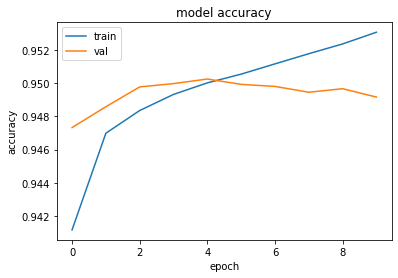

In [65]:
print(exp_model.history.history.keys())
plt.plot(exp_model.history.history['accuracy'])
plt.plot(exp_model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [66]:
preds = exp_model.predict(X_valid).reshape(-1)

In [67]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     61365
           1       0.61      0.43      0.51      3942

    accuracy                           0.95     65307
   macro avg       0.79      0.71      0.74     65307
weighted avg       0.94      0.95      0.95     65307



Метрики по сравнению с моделью с одинаковой активацией dense слоев не сильно изменились, но и не стали хуже. График стал выглядеть лучше: валидация не так сильно падает.

**Теперь попробуем поэкспериментировать с параметрами эмбеддингов**

Возьмем предыдущую модель, сделаем mask_zero= True, а также добавим embeddings_regularizer

In [83]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings1 = tf.keras.layers.Embedding(input_dim=len(word2id), mask_zero=True, 
                                        embeddings_regularizer=tf.keras.regularizers.l1_l2(l1=0.02, l2=0.02),
                                        output_dim=100, trainable=False, weights=[w2v_weights])(inputs, )
embeddings2 = tf.keras.layers.Embedding(input_dim=len(word2id), mask_zero= True,
                                        embeddings_regularizer=tf.keras.regularizers.l1_l2(l1=0.02, l2=0.02),
                                        output_dim=100, trainable=False,weights=[ft_weights])(inputs, )
embeddings = tf.keras.layers.Concatenate()([embeddings1, embeddings2])

mean = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(64, activation='softmax')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
dense = tf.keras.layers.Dense(64)(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

exp_model1 = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
exp_model1.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [84]:
exp_model1.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=512,
         epochs=10)

Epoch 1/10
2424/2424 [==============================] - 58s 24ms/step - loss: 52165.9023 - accuracy: 0.9407 - val_loss: 52164.0312 - val_accuracy: 0.9468
Epoch 2/10
2424/2424 [==============================] - 57s 23ms/step - loss: 52165.8789 - accuracy: 0.9464 - val_loss: 52164.0312 - val_accuracy: 0.9480
Epoch 3/10
2424/2424 [==============================] - 57s 23ms/step - loss: 52165.8789 - accuracy: 0.9478 - val_loss: 52164.0312 - val_accuracy: 0.9492
Epoch 4/10
2424/2424 [==============================] - 57s 23ms/step - loss: 52165.8789 - accuracy: 0.9485 - val_loss: 52164.0273 - val_accuracy: 0.9491
Epoch 5/10
2424/2424 [==============================] - 57s 24ms/step - loss: 52165.8789 - accuracy: 0.9492 - val_loss: 52164.0234 - val_accuracy: 0.9497
Epoch 6/10
2424/2424 [==============================] - 57s 24ms/step - loss: 52165.8789 - accuracy: 0.9499 - val_loss: 52164.0273 - val_accuracy: 0.9500
Epoch 7/10
2424/2424 [==============================] - 57s 24ms/step - loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


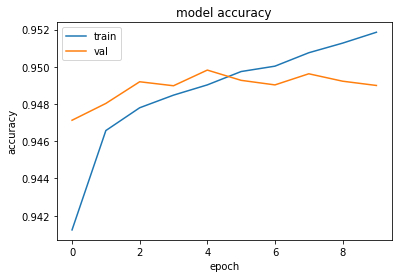

In [73]:
print(exp_model1.history.history.keys())
plt.plot(exp_model1.history.history['accuracy'])
plt.plot(exp_model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [75]:
preds = exp_model1.predict(X_valid).reshape(-1)

In [76]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     61365
           1       0.62      0.39      0.48      3942

    accuracy                           0.95     65307
   macro avg       0.79      0.69      0.73     65307
weighted avg       0.94      0.95      0.94     65307



Метрики получились примерно такие же, как и у предыдущей модели без дополнительных параметров. 